# Data Generation

This nb to generate data of the BE 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

In [2]:
SEED=1

**Create df**

In [3]:
nb_days = 1

end_time = datetime.today()
# ex: '11/16/2022, 17:34:05'

# 10 days before
start_time = end_time - timedelta(days=nb_days)

n_points = nb_days * 24 * 60 # minutes in `nb_days` days

df_time = pd.date_range(start=start_time,
                        end=end_time,
                        periods=n_points)
# ex:Series(['2021-03-25 14:22:24.824136', ...])

# df_time = df_time.strftime("%Y-%m-%d %H:%M:%S")

print(f"Extended period, from: `{start_time}` until `{end_time}`")
print(f"Generated {len(df_time)} points")

Extended period, from: `2022-11-24 15:50:06.543641` until `2022-11-25 15:50:06.543641`
Generated 1440 points


**Into df**

In [4]:
df_time = pd.Series(df_time).to_frame("time")
df_time.head(2)

,time
0,2022-11-24 15:50:06.543641000
1,2022-11-24 15:51:06.585336621


**Add timestamp col**

In [5]:
df_time['datetime'] = df_time[['time']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)

**Add `is_hole` col permitting to create holes**

In [6]:
df_time["is_hole"] = 0
df_time.set_index("time", inplace=True)

**Add a `orbit_id` col**

One orbit = n_points / n_orbits

In [7]:
nb_orbits = 10

orbits = [[k] * (round(len(df_time)/10)) for k in range(nb_orbits)]

# flatten
flat_orbit_list = [item for sublist in orbits for item in sublist]

In [8]:
df_time['orbit_id'] = flat_orbit_list

**Sort**

In [9]:
df_time.sort_index(inplace=True)

In [10]:
print(f"Get data from `{df_time.iloc[0].name}` to `{df_time.iloc[-1].name}`")

Get data from `2022-11-24 15:50:06.543641` to `2022-11-25 15:50:06.543641`


**Artificially create holes**

Create `nb_holes`:
* at random location (`hole_list`)
* with random legth (`hole_duration`) -> get some holes with large duration

Note: usage of a seed at the begenning of the script to get reproducible results.

In [11]:
# Generate k holes
nb_holes = 5

# Index of first points of the hole to create
hole_list = np.random.choice(range(len(df_time)), nb_holes, replace=False)

# duration of each holes (in nb of points)
hole_duration = np.random.randint(low=10,
                                  high=n_points * 0.10,  # 10% of the nb points
                                  size=nb_holes)

In [12]:
hole_list

array([1391,  473,  642,  977,  832])

In [13]:
hole_duration

array([ 23,  14,  70, 123, 114])

Update col "is hole"

In [14]:
df_with_holes = df_time.copy(deep=True)

for i, hole_index in enumerate(hole_list):
    
    current_hole_duration = hole_duration[i]  # ex: 25, means 25 next pts shall be rm
    
    # Update col "is_hole"
    df_with_holes.loc[hole_index:(hole_index + current_hole_duration), 'is_hole']=1
    # ex: ['2021-03-25 14:31:39.412124843',...]

print(f"Get {len(df_with_holes[df_with_holes['is_hole'] != 0])} points tagged 'hole'.")

Get 344 points tagged 'hole'.


C:\Users\JED\AppData\Local\Temp\ipykernel_7828\1281873294.py:8: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  df_with_holes.loc[hole_index:(hole_index + current_hole_duration), 'is_hole']=1


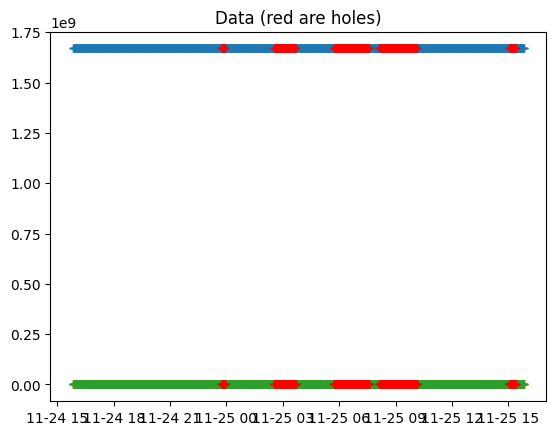

In [15]:
plt.plot(df_with_holes, "+")
plt.plot(df_with_holes[df_with_holes['is_hole'] != 0], 'r+')
plt.title("Data (red are holes)")
plt.show()

**Final format**

In [16]:
series_data = df_with_holes[df_with_holes['is_hole'] != 1].index.to_series().sort_values()

series_data

time
2022-11-24 15:50:06.543641000   2022-11-24 15:50:06.543641000
2022-11-24 15:51:06.585336621   2022-11-24 15:51:06.585336621
2022-11-24 15:52:06.627032243   2022-11-24 15:52:06.627032243
2022-11-24 15:53:06.668727865   2022-11-24 15:53:06.668727865
2022-11-24 15:54:06.710423487   2022-11-24 15:54:06.710423487
                                             ...             
2022-11-25 15:46:06.376858512   2022-11-25 15:46:06.376858512
2022-11-25 15:47:06.418554134   2022-11-25 15:47:06.418554134
2022-11-25 15:48:06.460249756   2022-11-25 15:48:06.460249756
2022-11-25 15:49:06.501945378   2022-11-25 15:49:06.501945378
2022-11-25 15:50:06.543641000   2022-11-25 15:50:06.543641000
Name: time, Length: 1096, dtype: datetime64[ns]

**Create data**

In [17]:
# Drop holes
df = df_with_holes[df_with_holes['is_hole'] != 1]

df.drop(columns='is_hole', inplace=True)


# Create fake cols of values
df["tm_1"] = np.random.randint(0, 10, size=len(df))
df["tm_2"] = np.random.randint(0, 10, size=len(df))

df.head(2)

C:\Users\JED\AppData\Local\Temp\ipykernel_7828\2073913602.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='is_hole', inplace=True)
C:\Users\JED\AppData\Local\Temp\ipykernel_7828\2073913602.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tm_1"] = np.random.randint(0, 10, size=len(df))
C:\Users\JED\AppData\Local\Temp\ipykernel_7828\2073913602.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

,datetime,orbit_id,tm_1,tm_2
time,,,,
2022-11-24 15:50:06.543641000,1669305006,0,2,7
2022-11-24 15:51:06.585336621,1669305066,0,9,0


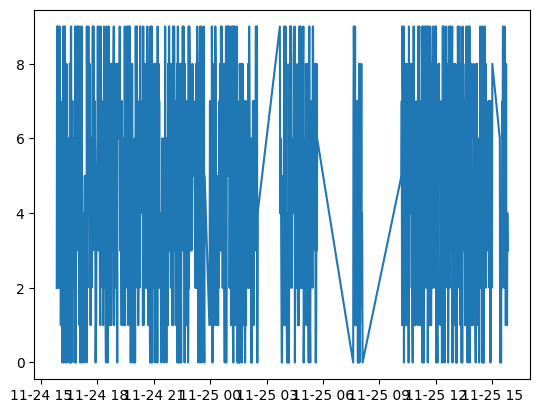

In [18]:
plt.plot(df.tm_1)

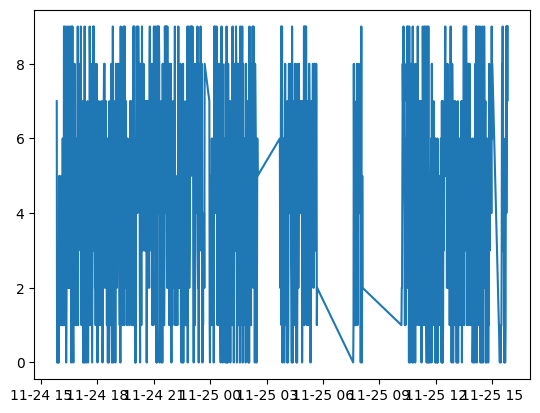

In [19]:
plt.plot(df.tm_2)

In [20]:
df = df.reset_index()

**Create shifts**

* Choose one orbit
* plus 200%

In [21]:
df

,time,datetime,orbit_id,tm_1,tm_2
0,2022-11-24 15:50:06.543641000,1669305006,0,2,7
1,2022-11-24 15:51:06.585336621,1669305066,0,9,0
2,2022-11-24 15:52:06.627032243,1669305126,0,2,2
3,2022-11-24 15:53:06.668727865,1669305186,0,9,3
4,2022-11-24 15:54:06.710423487,1669305246,0,9,0
...,...,...,...,...,...
1091,2022-11-25 15:46:06.376858512,1669391166,9,1,4
1092,2022-11-25 15:47:06.418554134,1669391226,9,4,7
1093,2022-11-25 15:48:06.460249756,1669391286,9,1,9
1094,2022-11-25 15:49:06.501945378,1669391346,9,4,7


In [22]:
orbit_to_shift = 2

In [23]:
# 200% shift 
new_value = df[df.orbit_id == orbit_to_shift]['tm_2'] * 2
df.loc[df.orbit_id == 2, 'tm_2'] = new_value

**See result**

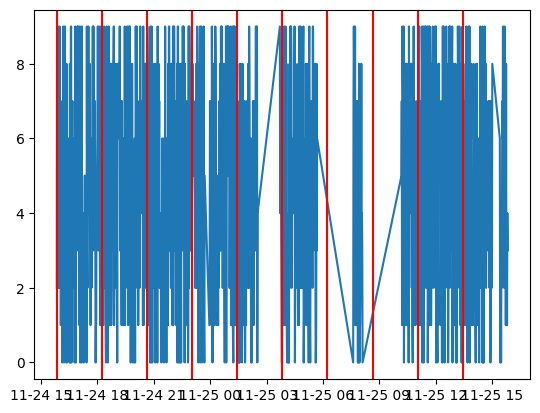

In [24]:
plt.plot(df.time, df.tm_1)

# One red vertical line per orbit
for k in df_time.reset_index().groupby('orbit_id').first()["time"]:
    plt.axvline(k, color='r')

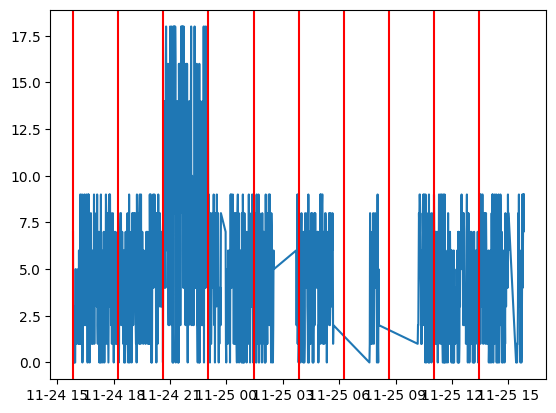

In [25]:
plt.plot(df.time, df.tm_2)

# One red vertical line per orbit
for k in df_time.reset_index().groupby('orbit_id').first()["time"]:
    plt.axvline(k, color='r')   

In [26]:
df.groupby("orbit_id").mean()

,datetime,tm_1,tm_2
orbit_id,,,
0,1.669309e+09,4.506944,4.000000
1,1.669318e+09,4.840278,4.395833
2,1.669327e+09,4.375000,8.958333
3,1.669335e+09,4.538462,4.507692
4,1.669342e+09,4.243243,4.121622
5,1.669352e+09,4.464286,4.473214
6,1.669363e+09,3.838710,4.161290
7,1.669373e+09,4.692308,4.730769
8,1.669378e+09,4.750000,4.000000


**Artificially create spikes**

At random loc

In [27]:
np.random.seed(SEED)
nb_spikes=1
spikes_values = 10e4  # all the same value (easier to generate)

# Determine (randomly) if first TM shall have consecutive spikes or not
is_consecutive = np.random.choice([True, False])  

for tm in ["tm_1", "tm_2"]:

    # If consecutive:...
    if is_consecutive:
        # Generate the position of the first oultier (the second one shall be at position+1)
        spike_index = np.random.randint(0, len(df) -1)
        
        spike_position = df.iloc[[spike_index, spike_index+1]].index.values
        
        df.loc[spike_position, tm] = spikes_values 
        
        print(f"TM: {tm}, consecutive spikes at: {df[df[tm] > 10e3]}")
    else:
        # Generate just one spike
        spike_index = np.random.randint(0, len(df) -1)
        
        spike_position = df.iloc[[spike_index]].index.values
        
        df.loc[spike_position, tm] = spikes_values 
        
        print(f"TM: {tm}, 1 spikes at: {df[df[tm] > 10e3]}")
        
    # Next TM=> generate the contrary situation
    is_consecutive = not is_consecutive


TM: tm_1, 1 spikes at:                              time    datetime  orbit_id    tm_1  tm_2
235 2022-11-24 19:45:16.342112160  1669319116         1  100000     2
TM: tm_2, consecutive spikes at:                              time    datetime  orbit_id  tm_1    tm_2
905 2022-11-25 12:16:57.662473522  1669378617         8     3  100000
906 2022-11-25 12:17:57.704169144  1669378677         8     7  100000


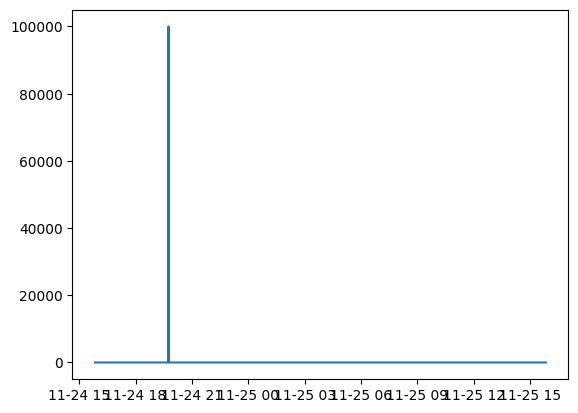

In [28]:
plt.plot(df.time, df.tm_1)

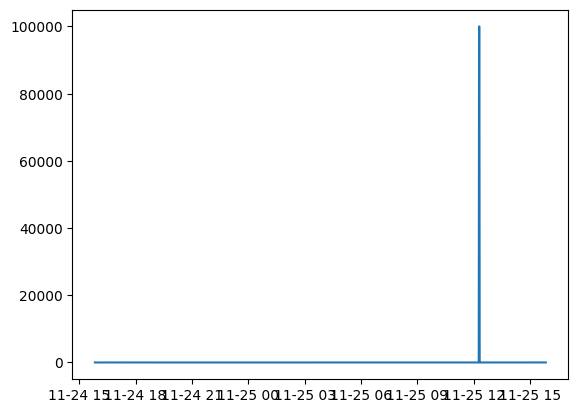

In [29]:
plt.plot(df.time, df.tm_2)

**Write result in a csv**

In [30]:
df.to_csv("data/data.csv", index=False)

In [31]:
pd.read_csv("data/data.csv").head()

,time,datetime,orbit_id,tm_1,tm_2
0,2022-11-24 15:50:06.543641000,1669305006,0,2,7
1,2022-11-24 15:51:06.585336621,1669305066,0,9,0
2,2022-11-24 15:52:06.627032243,1669305126,0,2,2
3,2022-11-24 15:53:06.668727865,1669305186,0,9,3
4,2022-11-24 15:54:06.710423487,1669305246,0,9,0
